In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
comparison = "/Users/jolivie1/Desktop/Research/equivalence_testing_output/scripts/output/perform_test_tabular_data/GSE206932_age_1_0_results.csv"
results = pd.read_csv("~/Desktop/Research/equivalence_testing_output/scripts/output/equiv_test_vectorized/GSE206932_age_1.0_results.csv",index_col = 0)
comp = pd.read_csv(comparison, index_col = 0)
deseq2 = pd.read_csv("~/Desktop/Research/equivalence_testing_output/scripts/output/deseq_normalization/GSE206932_age_deseq2_results.csv", index_col = 0)

In [41]:
deseq2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Trank1,246.808990,-3.365156,0.201387,-16.709869,1.110789e-62,2.398971e-58
Cilp2,2835.185832,1.858988,0.113645,16.357906,3.820415e-60,4.125475e-56
Scgn,62.765063,-3.158782,0.206885,-15.268305,1.243639e-52,8.952957e-49
Igha,2599.394455,-3.588878,0.238906,-15.022129,5.259144e-51,2.839544e-47
Col1a1,56582.346644,1.186653,0.082271,14.423646,3.674077e-47,1.586981e-43
...,...,...,...,...,...,...
AC117663.3,1.972742,-0.975969,0.851461,-1.146228,2.517008e-01,NaN
AL772212.1,0.000000,NaN,NaN,NaN,NaN,NaN
AL805980.1,1.037664,-0.143999,1.325794,-0.108613,9.135093e-01,NaN
AL590997.4,0.000000,NaN,NaN,NaN,NaN,NaN


In [42]:
merged = pd.merge(results, comp, left_index = True, right_index = True, suffixes = ["_results", "_comp"]).merge(deseq2, left_index = True, right_index = True)

In [43]:
merged

,avg_group1_log2_results,avg_group2_log2_results,nnz_group1_results,nnz_group2_results,eff_size_results,avg_group1_results,avg_group2_results,fold_change_results,diff_pval_results,equiv_pval_results,...,diff_pval_adj_comp,sig_diff_comp,equiv_pval_adj_comp,sig_equiv_comp,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Prrxl1,6.083772,3.325149,6,6,2.758623,67.826258,10.022349,6.767501,3.388911e-09,9.999999e-01,...,0.000036,True,1.000000e+00,False,38.391780,-2.912465,0.256391,-11.359466,6.655052e-30,4.956178e-27
Scgn,6.825182,3.747797,6,6,3.077385,113.392540,13.433816,8.440829,5.802966e-09,9.999999e-01,...,0.000003,True,1.000000e+00,False,62.765063,-3.158782,0.206885,-15.268305,1.243639e-52,8.952957e-49
Rfng,9.092809,9.510107,6,6,-0.417298,546.019601,729.167929,0.748826,1.399436e-08,3.015951e-10,...,0.000055,False,5.519680e-11,True,636.821347,0.420759,0.046544,9.040058,1.565887e-19,4.175118e-17
Sema5b,7.535782,5.774549,6,6,1.761234,185.565186,54.740956,3.389878,2.272211e-08,9.999820e-01,...,0.000062,True,1.000000e+00,False,119.857511,-1.754390,0.129035,-13.596262,4.214309e-42,1.300235e-38
Ephb2,8.706187,9.438369,6,6,-0.732182,417.660430,693.796616,0.601993,4.458125e-08,1.136613e-04,...,0.000090,False,5.212507e-05,True,555.402234,0.729779,0.057333,12.728729,4.094520e-37,6.802257e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zc3h8,6.294303,6.294354,6,6,-0.000051,78.482720,78.485497,0.999965,9.996445e-01,2.440081e-06,...,0.999713,False,7.899164e-07,True,78.083658,-0.012566,0.135406,-0.092801,9.260614e-01,9.688586e-01
n.R5s197,1.892780,1.892667,6,6,0.000112,3.713500,3.713211,1.000078,9.996722e-01,1.872066e-03,...,0.999713,False,1.539971e-03,True,2.879322,0.045929,0.619851,0.074096,9.409336e-01,9.754035e-01
Gm25821,0.685335,0.685499,4,3,-0.000164,1.608076,1.608258,0.999887,9.996806e-01,1.636953e-02,...,0.999713,False,1.402906e-02,True,0.767752,0.088286,1.299458,0.067941,9.458330e-01,NaN
Olfr1301,0.449902,0.450075,2,2,-0.000173,1.365947,1.366111,0.999880,9.996823e-01,2.015926e-02,...,0.999713,False,1.851076e-02,True,0.544264,-0.029352,1.859817,-0.015782,9.874080e-01,NaN


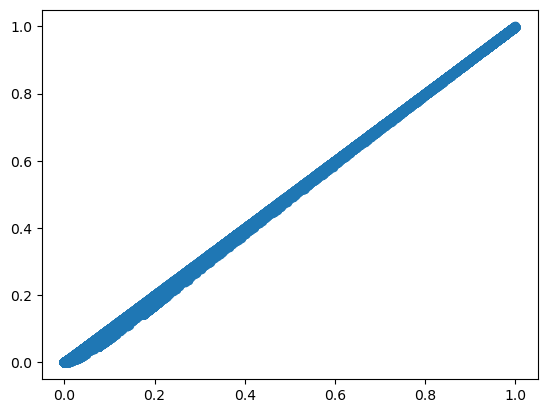

In [30]:
col = "diff_pval"
plt.plot(merged[col + "_results"], merged[col + "_comp"], marker = "o", linestyle="")
plt.show()

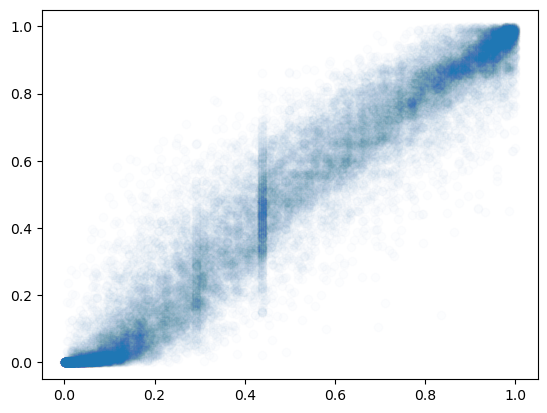

In [47]:
col1 = "diff_pval_adj"
plt.plot(merged[col1 + "_results"], merged["padj"], marker = "o", linestyle="", alpha = 0.01)
plt.show()

In [58]:
diff_results = set(merged[merged["diff_pval_adj_results"] < 0.05].index)
diff_deseq = set(merged[merged["padj"] < 0.05].index)
diff_deseq_fc = set(merged[(merged["padj"] < 0.05) & ((merged["fold_change_results"] > 1) | (merged["fold_change_results"] < -1))].index)
len(diff_results.intersection(diff_deseq))

2264

In [59]:
len(diff_results - diff_deseq)

132

In [66]:
len(diff_results.intersection(diff_deseq_fc))

1068

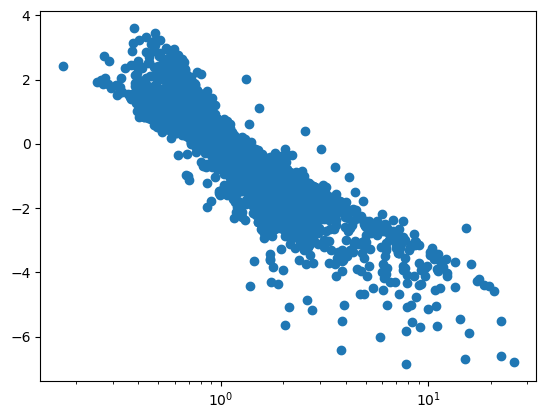

In [50]:
col1 = "fold_change"
col2 = "log2FoldChange"
plt.plot(merged[col1 + "_results"], merged[col2], marker = "o", linestyle="")
plt.xscale("log")
plt.show()